In [350]:
import warnings
warnings.filterwarnings('ignore')

import requests

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pysal.viz import mapclassify
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

### Geospatial data analysis

![](https://v3.urbica.co/static/media/image-3@2x.58bbd26c.png)

**Geospatial data is data about objects, events, or phenomena that have a location on the surface of the earth.**

<img src="img/address_in_twit.png" width="500">

![](http://msp.naturalcapitalproject.org/msp_concierge_master/img/data_formats.png)

- Vector geodata formats:
    - **.geojson**, .shp, .kml, .gpkg, .gpx, etc.
    - .txt, .csv, .xls, .json
- Rester geodata formats:
    - .geotiff, .tiff, .jpeg, .asc, etc. 

Attributes + Coordinate information

![](img/geojson.png)

### Geometric Objects - [shapely](https://shapely.readthedocs.io/en/latest/manual.html#geometric-objects)

In [492]:
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

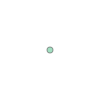

In [283]:
point_a = Point(0,0)
point_a

In [286]:
point_b = Point(1,1)

In [611]:
point_a.wkt

'POINT (0 0)'

In [612]:
point_a.distance(point_b)

1.4142135623730951

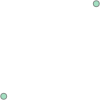

In [297]:
MultiPoint([point_a, point_b])

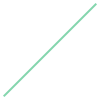

In [63]:
LineString([point_a,point_b])

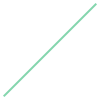

In [64]:
LineString([(0,0),(1,1)])

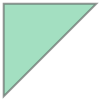

In [476]:
Polygon([(0,0),(1,1),(0,1),(0,0)])

In [300]:
outer = Polygon(((0,0),(10,0),(10,10),(0,10),(0,0)))
inner = Polygon(((4,4),(4,6),(6,6),(6,4),(4,4)))
inner2 = Polygon(((2,2),(2,3),(3,3),(3,2),(2,2)))

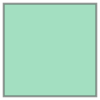

In [301]:
outer

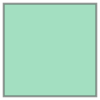

In [307]:
inner

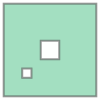

In [304]:
p = Polygon(outer.exterior.coords, [inner.exterior.coords,
                                    inner2.exterior.coords])
p

In [305]:
print(p)

POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0), (4 4, 4 6, 6 6, 6 4, 4 4), (2 2, 2 3, 3 3, 3 2, 2 2))


### Geopandas

[NYC Open Data Portal](https://opendata.cityofnewyork.us/)

In [40]:
nyc_boroughs = gpd.read_file('data/new-york-city-boroughs.geojson')
nyc_boroughs

,name,cartodb_id,created_at,updated_at,geometry
0,Staten Island,1,2013-03-09T02:42:03,2013-03-09T02:42:03,"(POLYGON ((-74.05050799999999 40.566422, -74.0..."
1,Queens,2,2013-03-09T02:42:03,2013-03-09T02:42:03,"(POLYGON ((-73.83668299999999 40.594947, -73.8..."
2,Brooklyn,3,2013-03-09T02:42:03,2013-03-09T02:42:03,"(POLYGON ((-73.86706100000001 40.582088, -73.8..."
3,Manhattan,4,2013-03-09T02:42:03,2013-03-09T02:42:03,"(POLYGON ((-74.01092800000001 40.684491, -74.0..."
4,Bronx,5,2013-03-09T02:42:03,2013-03-09T02:42:03,"(POLYGON ((-73.896809 40.795808, -73.896939 40..."


In [73]:
nyc_boroughs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
name          5 non-null object
cartodb_id    5 non-null int64
created_at    5 non-null object
updated_at    5 non-null object
geometry      5 non-null object
dtypes: int64(1), object(4)
memory usage: 280.0+ bytes


In [328]:
type(nyc_boroughs.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

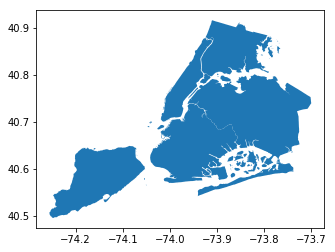

In [74]:
nyc_boroughs.plot();

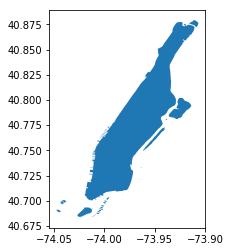

In [342]:
manhattan = nyc_boroughs[nyc_boroughs['name'] == 'Manhattan'].reset_index(drop=True)
manhattan.plot();

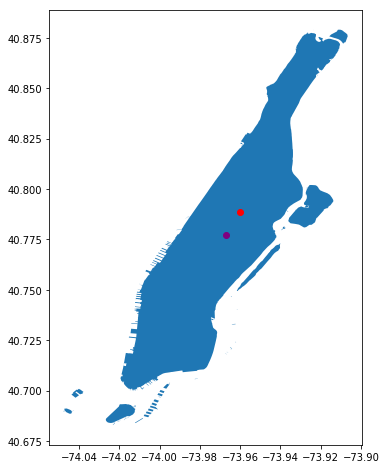

In [343]:
ax = manhattan.plot(figsize=(10, 8))
manhattan.centroid.plot(ax=ax, color='purple')
manhattan.representative_point().plot(ax=ax, color='red');

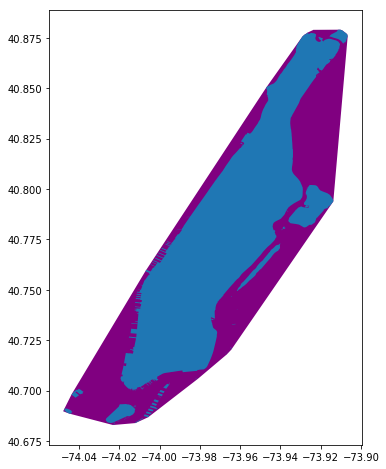

In [344]:
ax = manhattan.convex_hull.plot(color='purple', figsize=(10, 8))
manhattan.plot(ax=ax);

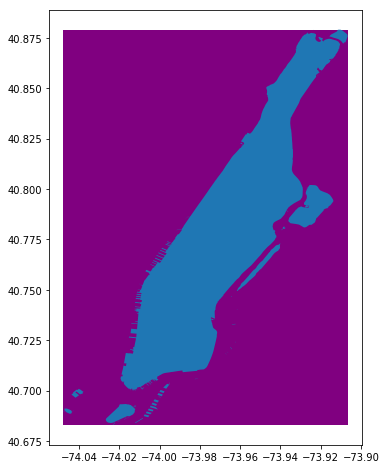

In [345]:
ax = manhattan.envelope.plot(color='purple', figsize=(10, 8))
manhattan.plot(ax=ax);

In [346]:
manhattan = manhattan.to_crs(epsg=32618)

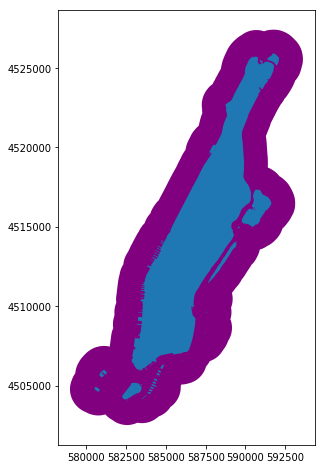

In [347]:
ax = manhattan.buffer(1500).plot(color='purple', figsize=(10, 8))
ax = manhattan.plot(ax=ax)

### OSM Data, Overpass API

![](img/osm_type.png)

https://wiki.openstreetmap.org/wiki/Key:name

![](https://cdn-images-1.medium.com/max/1600/1*naEo03Ssn3-69xzLZIpZPQ.png)

In [349]:
import overpass

api = overpass.API(endpoint="https://overpass.kumi.systems/api/interpreter")
response = api.get('node["name"="Empire State Building"]')
response

{"features": [{"geometry": {"coordinates": [-73.9849958, 40.7481628], "type": "Point"}, "id": 2709306673, "properties": {"addr:housenumber": "350", "addr:postcode": "10118", "addr:street": "5th Avenue", "name": "Empire State Building", "name:ko": "\uc5e0\ud30c\uc774\uc5b4 \uc2a4\ud14c\uc774\ud2b8 \ube4c\ub529", "opening_hours": "Mo-Su 08:00-02:00", "phone": "2127363100", "tourism": "attraction", "website": "https://www.esbnyc.com/", "wheelchair": "yes"}, "type": "Feature"}, {"geometry": {"coordinates": [16.7553574, 52.2957335], "type": "Point"}, "id": 5552887205, "properties": {"name": "Empire State Building", "tourism": "artwork"}, "type": "Feature"}], "type": "FeatureCollection"}

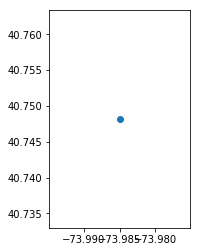

In [351]:
empire_state_building = gpd.GeoDataFrame(
    geometry=[Point(response[0]['geometry']['coordinates'])],
    crs={'init': 'epsg:4326'})
empire_state_building.plot();

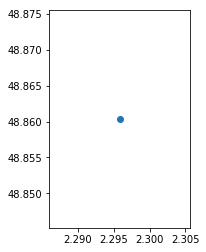

In [352]:
response = api.get('node["name"="Tour Eiffel"]')
eiffel_tower = gpd.GeoDataFrame(geometry=[Point(response[0]['geometry']['coordinates'])], 
                                         crs={'init': 'epsg:4326'})
eiffel_tower.plot();

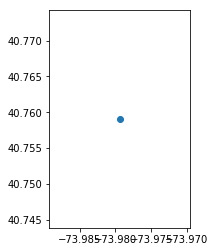

In [353]:
response = api.get('node["name"="Top of the Rock"]')
top_of_the_rock = gpd.GeoDataFrame(geometry=[Point(response[0]['geometry']['coordinates'])], 
                                         crs={'init': 'epsg:4326'})
top_of_the_rock.plot();

### Distance measurements

![](img/yandex_distance.png)

In [406]:
empire_state_building.distance(eiffel_tower)[0]

76.71094537066433

In [402]:
empire_state_building.to_crs(epsg=3857).distance(eiffel_tower.to_crs(epsg=3857)).round()[0] / 1000

8586.866

### Coordinate Reference Systems (CRS)

![Image of Yaktocat](https://ours-nature.ru/new_site/img/991345842/i_019.jpg)

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Geoid_undulation_10k_scale.jpg" width="500">

![](https://kartoweb.itc.nl/geometrics/Bitmaps/global%20&%20local%20ellipsoids.gif)

![](https://upload.wikimedia.org/wikipedia/commons/8/87/Tissot_mercator.png)

The true size of... [Greenland](https://thetruesize.com/#?borders=1~!MTc0NzM1OTM.NzgyOTkw*MzYwMDAwMDA(MA~!GL*MA.MTgwMDAwMDA)MA)

3857: WGS 84 / Pseudo-Mercator -- Spherical Mercator [epsg.io](https://epsg.io/3857)

In [412]:
from geopy import distance

empire_state_coords = empire_state_building.geometry[0].y,empire_state_building.geometry[0].x
eiffel_coords = eiffel_tower.geometry[0].y,eiffel_tower.geometry[0].x
rock_coords = top_of_the_rock.geometry[0].y,top_of_the_rock.geometry[0].x

In [413]:
distance.great_circle(empire_state_coords, eiffel_coords).km

5829.51090987715

In [401]:
distance.geodesic(empire_state_coords, eiffel_coords).km

5845.186243453013

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/WGS84_mean_Earth_radius.svg/1920px-WGS84_mean_Earth_radius.svg.png" width="300">

In [421]:
print(empire_state_building.to_crs(epsg=3857).distance(top_of_the_rock.to_crs(epsg=3857)).round()[0] / 1000,
     '- 3857 Euclidean distance',
      )
print(round(distance.great_circle(empire_state_coords,rock_coords).km, 3),
     '- Great Circle distance')
print(round(distance.geodesic(empire_state_coords,rock_coords).km, 3),
     '- WGS84  distance')

1.715 - 3857 Euclidean distance
1.298 - Great Circle distance
1.297 - WGS84  distance


![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Usgs_map_traverse_mercator.PNG)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Universal_Transverse_Mercator_zones.svg/2880px-Universal_Transverse_Mercator_zones.svg.png)

WGS 84 / UTM zone 18N [epsg.io](https://epsg.io/32618)

In [422]:
print(empire_state_building.to_crs(epsg=32618).distance(top_of_the_rock.to_crs(epsg=32618)).round()[0] / 1000,
     '- 32618 Euclidean distance',
      )

1.296 - 32618 Euclidean distance


In [613]:
print(manhattan.crs, top_of_the_rock.crs, empire_state_building.crs)

{'init': 'epsg:32618', 'no_defs': True} {'init': 'epsg:32618', 'no_defs': True} {'init': 'epsg:32618', 'no_defs': True}


In [474]:
empire_state_building = empire_state_building.to_crs(epsg=32618)
top_of_the_rock = top_of_the_rock.to_crs(epsg=32618)
print(empire_state_building.crs, top_of_the_rock.crs)

{'init': 'epsg:32618', 'no_defs': True} {'init': 'epsg:32618', 'no_defs': True}


In [484]:
%%timeit
empire_state_building.distance(top_of_the_rock)

1.26 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [453]:
%%timeit
distance.geodesic(empire_state_coords,rock_coords).km

289 µs ± 63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [454]:
%%timeit
distance.great_circle(empire_state_coords,rock_coords).km

19.6 µs ± 4.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [482]:
from scipy.spatial.distance import euclidean

In [483]:
%%timeit
euclidean(empire_state_coords,rock_coords)

26.4 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Spatial relations

In [534]:
manhattan.contains(empire_state_building)

0    True
dtype: bool

In [535]:
manhattan.contains(eiffel_tower)

0    False
dtype: bool

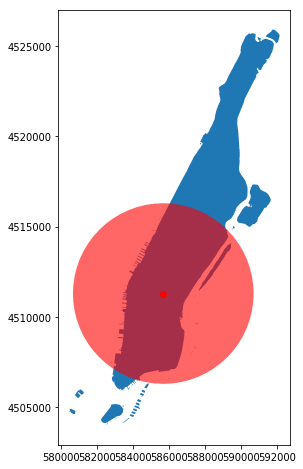

In [428]:
es_buffer = empire_state_building.buffer(5000)

ax = manhattan.plot(figsize=(10, 8))
ax = es_buffer.plot(color='r', ax=ax, alpha=0.6)
ax = empire_state_building.plot(ax=ax, color='r')

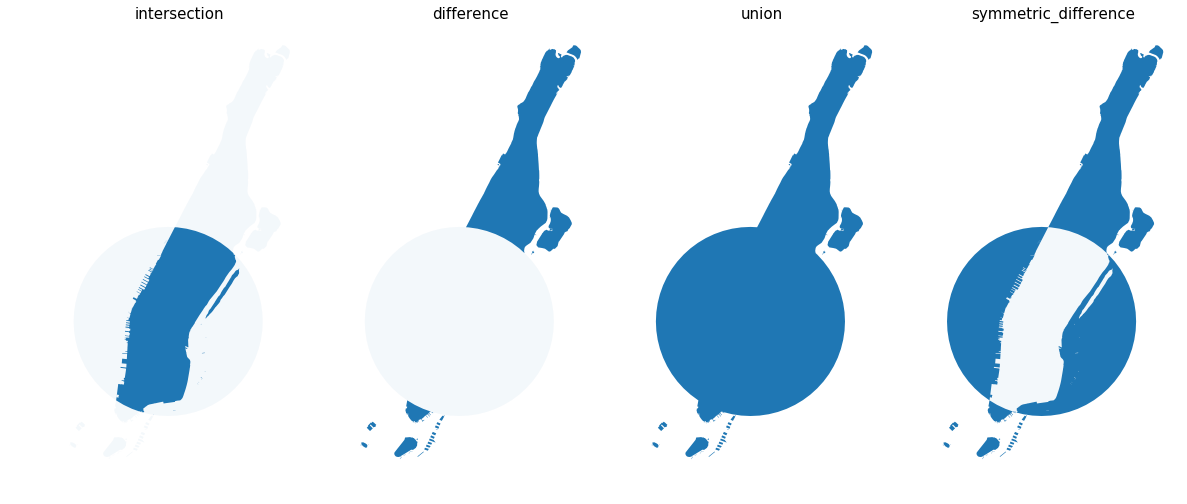

In [429]:
fig, axes = plt.subplots(1, 4, figsize=(20, 20))

polys = [manhattan.intersection(es_buffer),
manhattan.difference(es_buffer),
manhattan.union(es_buffer),
manhattan.symmetric_difference(es_buffer)]

titles = ['intersection', 'difference', 'union', 'symmetric_difference']

for x, ax in enumerate(axes.flatten()):
    ax = manhattan.union(es_buffer).plot(alpha=0.05, ax=ax)
    ax = polys[x].plot(ax=ax)
    ax.set_title(titles[x], size=15)
    ax.axis('off')

plt.show()

### NTAs - [NYC Open Data](https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas-NTA-/cpf4-rkhq)

In [523]:
nta = gpd.read_file('data/Neighborhood Tabulation Areas (NTA).geojson')
nta.head(2)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,BK88,54005019.048,047,Borough Park,39247.2278309,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...
1,QN51,52488277.5915,081,Murray Hill,33266.9048721,Queens,4,(POLYGON ((-73.80379022888246 40.7756101117924...


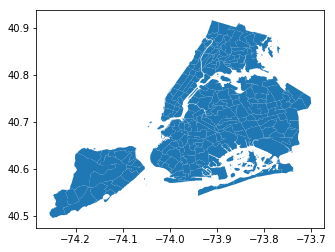

In [527]:
nta.plot();

In [584]:
df = pd.read_csv('data/train.csv', nrows=10000)
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


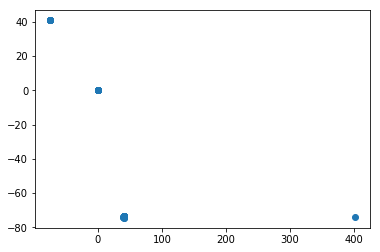

In [585]:
plt.scatter(df.pickup_latitude, df.pickup_longitude)

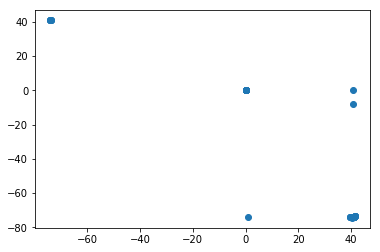

In [586]:
plt.scatter(df.dropoff_latitude, df.dropoff_longitude)

online bbox creation [tool](https://boundingbox.klokantech.com/)

In [587]:
lon_min = -74.103095
lat_min = 40.597399
lon_max = -73.729243
lat_max = 40.906114

ny_bbox = lat_min,lon_min,lat_max,lon_max

In [588]:
df = df[(df.pickup_longitude > lon_min)&
   (df.pickup_longitude < lon_max)&
   (df.pickup_latitude > lat_min)&
   (df.pickup_latitude < lat_max)&
   (df.dropoff_longitude > lon_min)&
   (df.dropoff_longitude < lon_max)&
   (df.dropoff_latitude > lat_min)&
   (df.dropoff_latitude < lat_max)].reset_index(drop=True)

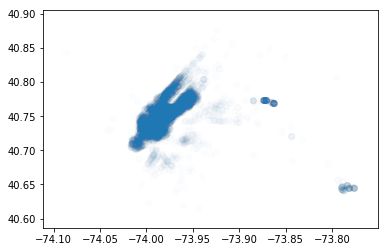

In [577]:
plt.scatter(df.pickup_longitude, df.pickup_latitude, alpha=.01)

In [578]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[40.730610, -73.935242], 
               zoom_start=11, 
               tiles='cartodbpositron')

heat_data = [[row['pickup_latitude'],row['pickup_longitude']] for index, row in df.iterrows()]


HeatMap(heat_data,
        radius=10).add_to(m)

m

### Spatial Join

<img src="img/join_types.png" width="500">

In [589]:
df['geometry'] = [Point(x,y) for x,y in zip (df.pickup_longitude, df.pickup_latitude)]
df = gpd.GeoDataFrame(df)

df = gpd.sjoin(df, nta[['ntacode', 'geometry']], op='within')
df = df.rename(columns={'ntacode':'pickup_nta'})
df = df.drop('index_right', axis=1)

df['geometry'] = [Point(x,y) for x,y in zip (df.dropoff_longitude, df.dropoff_latitude)]
df = gpd.GeoDataFrame(df)

df = gpd.sjoin(df, nta[['ntacode', 'geometry']], op='within')
df = df.rename(columns={'ntacode':'dropoff_nta'})
df = df.drop('index_right', axis=1)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,geometry,pickup_nta,dropoff_nta
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,POINT (-73.84161 40.712278),QN17,QN17
1443,2013-06-18 20:55:45.0000004,29.50,2013-06-18 20:55:45 UTC,-73.982925,40.764651,-73.846682,40.724244,1,POINT (-73.846682 40.724244),MN17,QN17
6185,2010-11-19 23:38:00.000000283,24.27,2010-11-19 23:38:00 UTC,-73.982287,40.752413,-73.857923,40.723263,2,POINT (-73.857923 40.723263),MN17,QN17
9662,2012-11-13 20:43:00.000000112,27.50,2012-11-13 20:43:00 UTC,-73.967562,40.763210,-73.837495,40.720497,1,POINT (-73.83749499999999 40.72049699999999),MN40,QN17
3414,2009-02-20 01:54:06.0000001,24.20,2009-02-20 01:54:06 UTC,-74.000421,40.728733,-73.849325,40.728551,1,POINT (-73.84932499999999 40.728551),MN23,QN17


In [591]:
nta = nta.merge(df.groupby('pickup_nta').count()['key'].rename('pickup_cnt').reset_index(),
                left_on='ntacode',
                right_on='pickup_nta')

In [592]:
nta = nta.merge(df.groupby('pickup_nta').mean()['fare_amount'].rename('mean_pickup_fare').reset_index(),
                left_on='ntacode',
               right_on='pickup_nta')

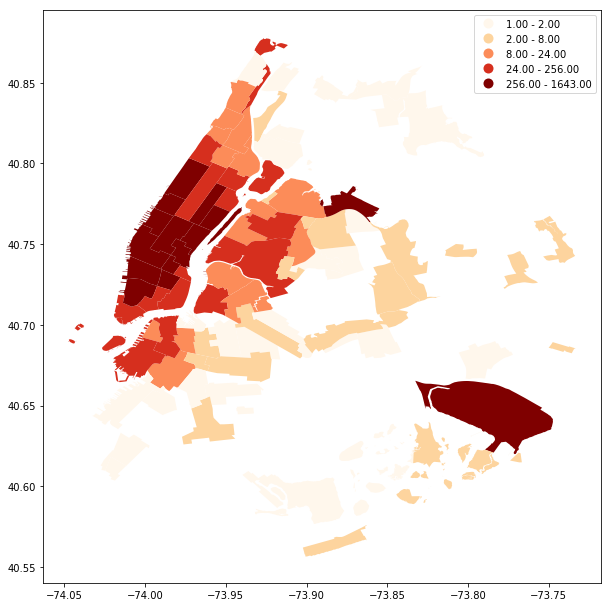

In [607]:
nta.plot('trip_cnt',
           figsize=(10, 15),
           cmap='OrRd', 
           scheme='quantiles',
           legend=True);

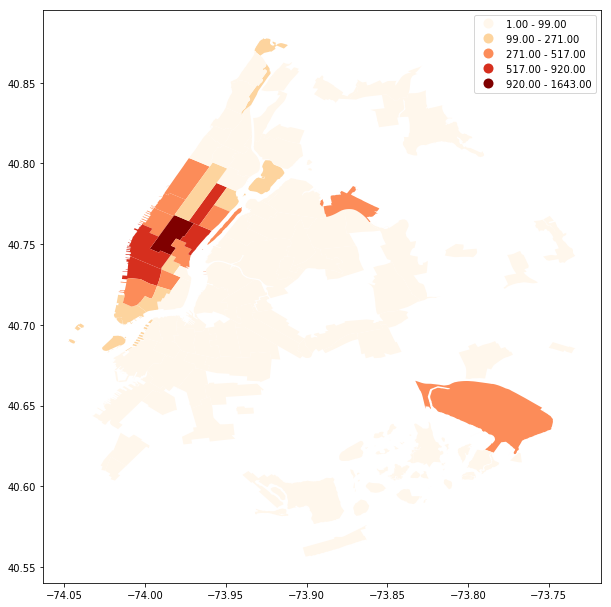

In [608]:
nta.plot('trip_cnt',
           figsize=(10, 15),
           cmap='OrRd', 
           scheme='fisher_jenks',
           legend=True);

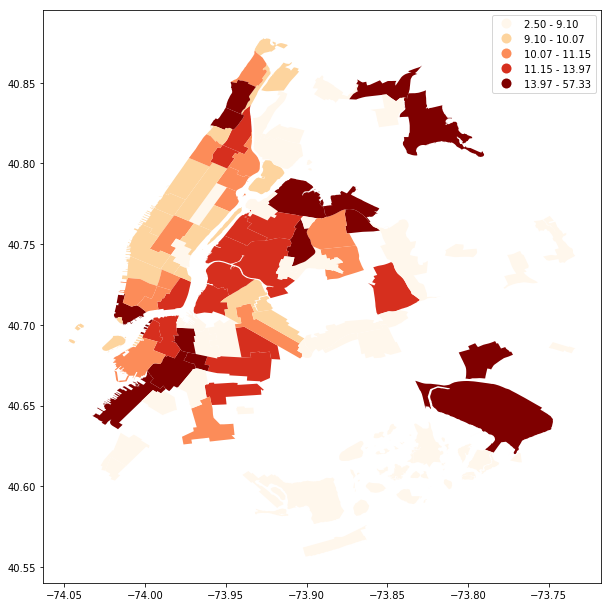

In [609]:
nta.plot('fare_amount',
           figsize=(10, 15),
           cmap='OrRd', 
           scheme='quantiles',
           legend=True);

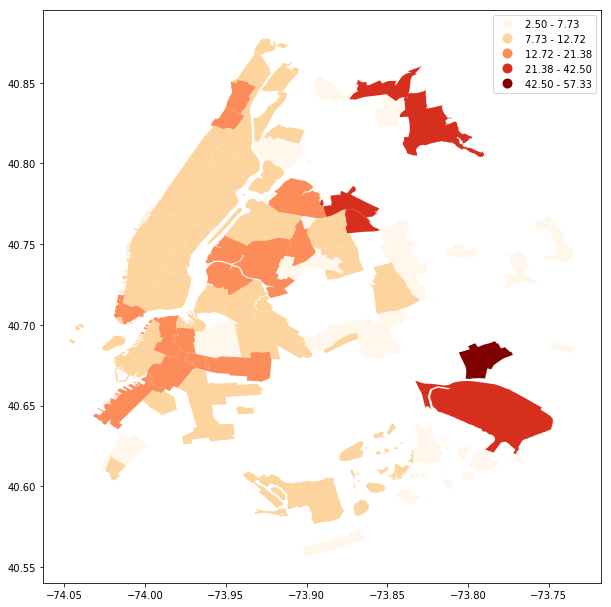

In [610]:
nta.plot('fare_amount',
           figsize=(10, 15),
           cmap='OrRd', 
           scheme='fisher_jenks',
           legend=True);

In [595]:
from keplergl import KeplerGl

In [606]:
kg_map = KeplerGl()
kg_map.add_data(nta)
kg_map

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'unnamed': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

In [605]:
kg_map2 = KeplerGl()
kg_map2.add_data(df)
kg_map2

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'unnamed': {'index': [0, 1443, 6185, 9662, 3414, 4384, 5861, 2084, 7410, 1955, 2753, 4275, 9023…

In [95]:
empire_state_building

,geometry
0,POINT (-73.98499579999999 40.7481628)


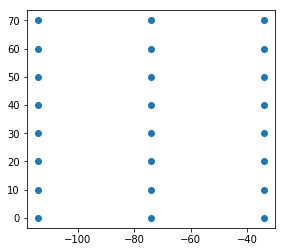

In [205]:
ny_lon = -73.98499
points = []

for lattitude in range(0,80,10):
    points.append(Point(ny_lon, lattitude))
    points.append(Point(ny_lon+40, lattitude))
    points.append(Point(ny_lon-40, lattitude))
    
points = gpd.GeoDataFrame(geometry=points, crs={'init': 'epsg:4326'})
points.plot();

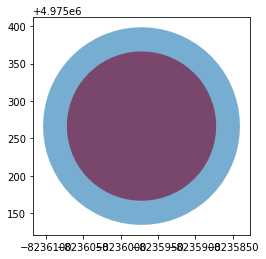

In [94]:
f,ax = plt.subplots()
empire_state_building.to_crs(epsg=3857).buffer(100).to_crs(epsg=3857).plot(ax=ax, color='red')
empire_state_building.to_crs(epsg=32618).buffer(100).to_crs(epsg=3857).plot(ax=ax, alpha=0.6)

In [206]:
points_mercator = points.copy()
points_mercator['geometry'] = points.to_crs(epsg=3857).buffer(500000)
points_mercator.crs = {'init': 'epsg:3857'}
points_mercator = points_mercator.to_crs(epsg=4326)

points_utm = points.copy()
points_utm['geometry'] = points.to_crs(epsg=32618).buffer(500000)
points_utm.crs = {'init': 'epsg:32618'}
points_utm = points_utm.to_crs(epsg=4326)

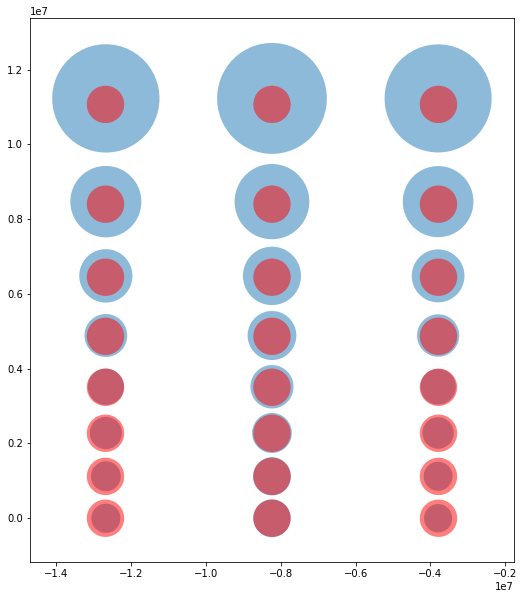

In [207]:
f, ax = plt.subplots(figsize=(10,10))
points_utm.to_crs(epsg=3857).plot(ax=ax, alpha=0.5)
points_mercator.to_crs(epsg=3857).plot(ax=ax, color='red', alpha=0.5)

In [208]:
points_mercator.to_file('check_merc2.geojson', driver='GeoJSON')
points_utm.to_file('check_utm2.geojson', driver='GeoJSON')

DriverIOError: GeoJSON driver doesn't support creating a layer on a read-only datasource

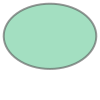

In [209]:
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')


def geodesic_point_buffer(lon, lat, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(==
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lon=lon, lat=lat)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf)

# Example
b = geodesic_point_buffer(-75.7, 45.4, 100.0)
b

In [211]:
points_geodesic = points.copy()
points_geodesic['geometry'] = points.apply(lambda x: geodesic_point_buffer(x['geometry'].x,
                                             x['geometry'].y,
                                            500), axis=1)

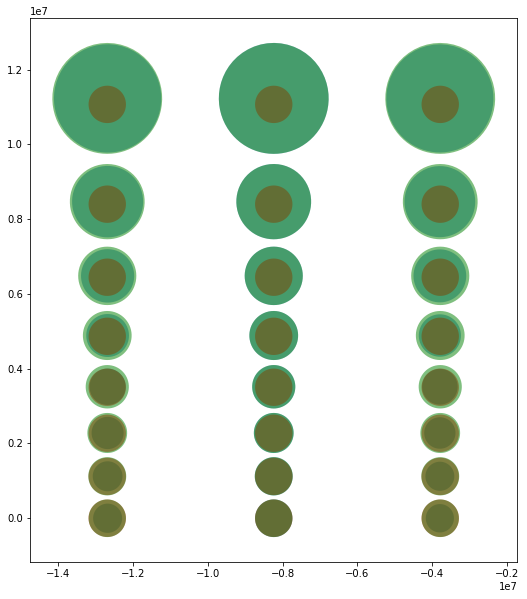

In [217]:
f, ax = plt.subplots(figsize=(10,10))
points_utm.to_crs(epsg=3857).plot(ax=ax, alpha=0.5)
points_mercator.to_crs(epsg=3857).plot(ax=ax, color='red', alpha=0.5)
points_geodesic.to_crs(epsg=3857).plot(ax=ax, color='green', alpha=0.5)

In [269]:
X,Y = np.mgrid[-160:170:10, -60:70:10]
xy = np.vstack((X.flatten(), Y.flatten())).T

In [270]:
geodesic_buffers = gpd.GeoDataFrame()

geodesic_buffers['geometry'] = gpd.GeoDataFrame(geometry=[Point(x) for x
 in xy]).apply(lambda x: geodesic_point_buffer(x['geometry'].x,
                                             x['geometry'].y,
                                            200), axis=1)

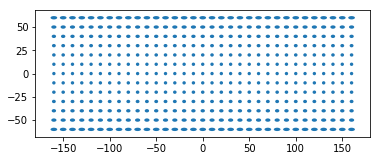

In [271]:
geodesic_buffers.plot()

In [267]:
geodesic_buffers.to_file('geodesic_buffers5.geojson', driver='GeoJSON')

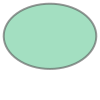

In [190]:
b

In [103]:
points.to_crs(epsg=32618).buffer(50000)

0     POLYGON ((662951.1480894252 0, 662710.38442303...
1     POLYGON ((6175021.003904309 0, 6174780.2402379...
2     POLYGON ((-5075021.003904306 0, -5075261.76757...
3     POLYGON ((661246.0417282104 1105583.613513702,...
4     POLYGON ((6039665.37713741 1552689.772609534, ...
5     POLYGON ((-4939665.377137408 1552689.772609533...
6     POLYGON ((656179.6355429925 2211803.001288206,...
7     POLYGON ((5660121.931825355 3019513.589036783,...
8     POLYGON ((-4560121.931825353 3019513.589036781...
9     POLYGON ((647897.945085658 3319218.953278086, ...
10    POLYGON ((5098881.841930371 4348774.844052171,...
11    POLYGON ((-3998881.841930368 4348774.844052169...
12    POLYGON ((636641.7457757528 4428250.548433637,...
13    POLYGON ((4422613.504936961 5529598.289775392,...
14    POLYGON ((-3322613.504936959 5529598.289775391...
15    POLYGON ((622742.1416015044 5539124.306762469,...
16    POLYGON ((3682675.752693696 6577911.400105381,...
17    POLYGON ((-2582675.752693694 6577911.40010

In [97]:
utm = []
merc = []

for x in range(0,80,10):

    merc.append(gpd.GeoSeries(Point(-73.98499, x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=3857).buffer(1000).to_crs(epsg=4326)[0])
    utm.append(gpd.GeoSeries(Point(-73.98499,x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=32618).buffer(1000).to_crs(epsg=4326)[0])
    
    merc.append(gpd.GeoSeries(Point(-30, x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=3857).buffer(1000).to_crs(epsg=4326)[0])
    utm.append(gpd.GeoSeries(Point(-30, x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=32618).buffer(1000).to_crs(epsg=4326)[0])
    
    merc.append(gpd.GeoSeries(Point(-120, x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=3857).buffer(1000).to_crs(epsg=4326)[0])
    utm.append(gpd.GeoSeries(Point(-120, x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=32618).buffer(1000).to_crs(epsg=4326)[0])


In [ ]:
utm = []
merc = []
for x in range(0,80,10):
    merc.append(gpd.GeoSeries(Point(-73.98499,x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=3857).buffer(1000).to_crs(epsg=4326)[0])
    utm.append(gpd.GeoSeries(Point(-73.98499,x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=32618).buffer(1000).to_crs(epsg=4326)[0])

In [ ]:
test = gpd.GeoDataFrame()
test['geometry'] = merc
test.to_file('merc4.geojson', driver='GeoJSON')

test['geometry'] = utm
test.to_file('utm4.geojson', driver='GeoJSON')

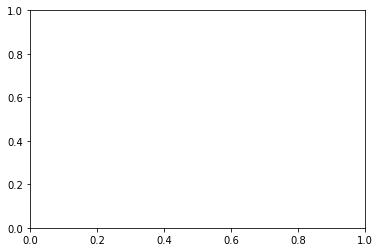

In [127]:
f,ax = plt.subplots()
for x in range(0,80,10):
    merc.append(gpd.GeoSeries(Point(-73.98499,x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=3857).buffer(500000).to_crs(epsg=4326)[0])
    utm.append(gpd.GeoSeries(Point(-73.98499,x),
                  crs={'init': 'epsg:4326'}).to_crs(epsg=32618).buffer(500000).to_crs(epsg=4326)[0])

In [ ]:
f,ax = plt.subplots()
gpd.GeoSeries(Point(-73.98499,10), crs={'init': 'epsg:4326'}).to_crs(epsg=3857).buffer(10000).to_crs(epsg=3857).plot(ax=ax, color='red')
gpd.GeoSeries(Point(-73.98499,10), crs={'init': 'epsg:4326'}).to_crs(epsg=32618).buffer(10000).to_crs(epsg=3857).plot(ax=ax, alpha=0.6)

In [ ]:
f,ax = plt.subplots()
gpd.GeoSeries(Point(-73.98499,40), crs={'init': 'epsg:4326'}).to_crs(epsg=3857).buffer(10000).to_crs(epsg=3857).plot(ax=ax, color='red')
gpd.GeoSeries(Point(-73.98499,40), crs={'init': 'epsg:4326'}).to_crs(epsg=32618).buffer(10000).to_crs(epsg=3857).plot(ax=ax, alpha=0.6)

In [ ]:
distance.great_circle((40.7481628, -73.9849958), (eiffel_tower.geometry[0].coords[0][1],
                                                  eiffel_tower.geometry[0].coords[0][0]))

In [ ]:
distance.geodesic((40.7481628, -73.9849958), (eiffel_tower.geometry[0].coords[0][1], eiffel_tower.geometry[0].coords[0][0]))

In [ ]:
empire_state_building.distance(top_of_the_rock)

In [ ]:
empire_state_building.to_crs(epsg=3857).distance(top_of_the_rock.to_crs(epsg=3857)).round() / 1000

In [ ]:
empire_state_building.to_crs(epsg=32618).distance(top_of_the_rock.to_crs(epsg=32618)).round() / 1000

In [ ]:
distance.great_circle((40.7481628, -73.9849958), (top_of_the_rock.geometry[0].coords[0][1],
                                                  top_of_the_rock.geometry[0].coords[0][0]))

In [ ]:
distance.geodesic((40.7481628, -73.9849958), (top_of_the_rock.geometry[0].coords[0][1],
                                                  top_of_the_rock.geometry[0].coords[0][0]))

In [ ]:
lon_min = -74.103095
lat_min = 40.597399
lon_max = -73.729243
lat_max = 40.906114

ny_bbox = lat_min,lon_min,lat_max,lon_max

overpass_url = "http://overpass-api.de/api/interpreter"

overpass_query = '''
[out:json];
(node["station"="subway"]({},{},{},{});
);
out center;
'''.format(*ny_bbox)

In [ ]:
lon_min = -74.103095
lat_min = 40.597399
lon_max = -73.729243
lat_max = 40.906114

ny_bbox = lat_min,lon_min,lat_max,lon_max

overpass_url = "http://overpass-api.de/api/interpreter"

overpass_query = '''
[out:json];
(node["amenity"]({},{},{},{});
);
out center;
'''.format(*ny_bbox)

In [ ]:
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
amenity = response.json()

In [ ]:
pd.DataFrame(amenity['elements']).shape

In [ ]:
amenity_osm = pd.DataFrame(amenity['elements'])
amenity_osm = amenity_osm.join(
    pd.DataFrame([x['tags'] for x in amenity['elements']])).drop('tags', axis=1)

In [446]:
lon_min = -74.103095
lat_min = 40.597399
lon_max = -73.729243
lat_max = 40.906114

ny_bbox = lat_min,lon_min,lat_max,lon_max

overpass_url = "http://overpass-api.de/api/interpreter"

overpass_query = '''
[out:json];
(way["amenity"]({},{},{},{});
);
out center;
'''.format(*ny_bbox)

response = requests.get(overpass_url, 
                        params={'data': overpass_query})
amenity = response.json()


amenity_osm = pd.DataFrame(amenity['elements'])
amenity_osm = amenity_osm.drop('type', axis=1).join(
    pd.DataFrame([x['tags'] for x in amenity['elements']])).drop('tags', axis=1)

In [ ]:
amenity['elements'][0]

In [ ]:
amenity_osm['lon'] = [x['lon'] for x in amenity_osm['center']]
amenity_osm['lat'] = [x['lat'] for x in amenity_osm['center']]

In [ ]:
amenity_osm.brand.value_counts()

In [ ]:
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [ ]:
data

In [ ]:
pd.DataFrame(data['elements']).head()

In [ ]:
stations_osm = pd.DataFrame(data['elements'])
stations_osm = stations_osm.join(pd.DataFrame([x['tags'] for x in data['elements']])).drop('tags', axis=1)

In [ ]:
stations_osm[['name', 'lat', 'lon', 'gtfs_stop_code', 'location']].head()

In [ ]:
top_of_the_rock.plot()

In [ ]:
f, ax = plt.subplots()
base = ax.scatter(amenity_osm.lon, amenity_osm.lat)
top_of_the_rock.plot(c='red', ax=ax);
empire_state_building.plot(c='red', ax=ax);

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
base = ax.scatter(amenity_osm.lon, amenity_osm.lat, alpha=0.01)
ax.scatter(amenity_osm[amenity_osm.cuisine == 'chinese'].lon,
           amenity_osm[amenity_osm.cuisine == 'chinese'].lat, c='orange')

ax.scatter(amenity_osm[amenity_osm.cuisine == 'italian'].lon,
           amenity_osm[amenity_osm.cuisine == 'italian'].lat, c='green')

ax.scatter(amenity_osm[amenity_osm.cuisine == 'japanese'].lon,
           amenity_osm[amenity_osm.cuisine == 'japanese'].lat, c='red')

#top_of_the_rock.plot(c='red', ax=ax);
#empire_state_building.plot(c='red', ax=ax);

In [ ]:
amenity_osm[['lon', 'lat', 'amenity', 'cuisine']].dropna().cuisine.value_counts()

In [ ]:
amenity_osm.columns.tolist()

In [ ]:
amenity_osm.denomination.value_counts()

In [ ]:
amenity_osm.denomination.value_counts()[:10]

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
base = ax.scatter(amenity_osm.lon, amenity_osm.lat, alpha=0.01)
ax.scatter(amenity_osm[amenity_osm.denomination == "baptist"].lon,
           amenity_osm[amenity_osm.denomination == "baptist"].lat, c='red')

ax.scatter(amenity_osm[amenity_osm.denomination == "catholic"].lon,
           amenity_osm[amenity_osm.denomination == "catholic"].lat, c='orange')

ax.scatter(amenity_osm[amenity_osm.denomination == "lutheran"].lon,
           amenity_osm[amenity_osm.denomination == "lutheran"].lat, c='black')

ax.scatter(amenity_osm[amenity_osm.denomination == "jehovahs_witness"].lon,
           amenity_osm[amenity_osm.denomination == "jehovahs_witness"].lat, c='green')
#top_of_the_rock.plot(c='red', ax=ax);
#empire_state_building.plot(c='red', ax=ax);

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
base = ax.scatter(amenity_osm.lon, amenity_osm.lat, alpha=0.01)
ax.scatter(amenity_osm[amenity_osm.amenity == 'dojo'].lon,
           amenity_osm[amenity_osm.amenity == 'dojo'].lat, c='orange')
#empire_state_building.plot(c='red', ax=ax);

In [ ]:
amenity_osm.religion.value_counts()

In [ ]:
amenity_osm[['lon',
             'lat',
             'amenity']].amenity.value_counts(
)[amenity_osm[['lon', 'lat', 'amenity']].amenity.value_counts() > 50]

In [ ]:
f, ax = plt.subplots()
base = ax.scatter(stations_osm.lon, stations_osm.lat)
top_of_the_rock.plot(c='red', ax=ax);
empire_state_building.plot(c='red', ax=ax);

In [ ]:
stations_osm.columns

In [ ]:
(40.7481628, -73.9849958)
(
1
(eiffel_tower.geometry[0].coords[0][1], eiffel_tower.geometry[0].coords[0][0])
(30.7489907, 76.7853286)

In [ ]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(40.7481628)
lon1 = radians(-73.9849958)
lat2 = radians(30.7489907)
lon2 = radians(76.7853286)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance_ = R * c

print("Result:", distance_)
print("Should be:", 278.546, "km")

In [ ]:
lat1 = 40.7481628
lon1 = -73.9849958
lat2 = 48.864716
lon2 = 2.349014
distance.geodesic((lat1, lon1), (lat2, lon2)).km

In [ ]:
(lat1, lon1)

## Дорожная сеть


### [OSMNX](https://github.com/gboeing/osmnx)

In [444]:
import networkx as nx
import osmnx as ox
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.10'

In [447]:
%%time
G = ox.graph_from_bbox(lat_max, lat_min, lon_max, lon_min,
                        network_type='drive')

CPU times: user 1min 25s, sys: 2.23 s, total: 1min 27s
Wall time: 1min 31s


In [ ]:
ox.plot_graph(G, fig_height=20, fig_width=20);

In [488]:
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
gdf_nodes.head()

,highway,osmid,ref,x,y,geometry
42467330,traffic_signals,42467330,NaN,-73.933676,40.655156,POINT (-73.93367600000001 40.655156)
42467331,traffic_signals,42467331,NaN,-73.932706,40.655216,POINT (-73.932706 40.655216)
42860546,NaN,42860546,NaN,-73.940454,40.743631,POINT (-73.9404536 40.7436311)
42467333,NaN,42467333,NaN,-73.931772,40.655273,POINT (-73.931772 40.655273)
42467334,traffic_signals,42467334,NaN,-73.930768,40.655336,POINT (-73.930768 40.655336)


In [489]:
from sklearn.neighbors import KDTree
tree = KDTree(gdf_nodes[['y', 'x']], metric='euclidean')

def find_nearest_node(tree, gdf, point):
    
    closest_idx = tree.query([(point.y, point.x)], k=1, return_distance=False)[0]
    nearest_node = gdf.iloc[closest_idx].index.values[0]
    
    return nearest_node

In [490]:
def osmnx_route(x1,y1,x2,y2):
    node1 = find_nearest_node(tree, gdf_nodes, Point(x1,y1))
    node2 = find_nearest_node(tree, gdf_nodes, Point(x2,y2))
    
    route = nx.shortest_path(G, node1, node2)
    route = ox.node_list_to_coordinate_lines(G, route)
    return MultiLineString(route)

In [ ]:
rail = ox.footprints.footprints_from_point((empire_state_building['geometry'][0].y,
                                     empire_state_building['geometry'][0].x),
                                    300,
                                    'amenity')
rail.dropna(subset=['amenity'])[['amenity']]

In [ ]:
pois.columns.tolist()

In [ ]:
pois = ox.pois.pois_from_point((top_of_the_rock['geometry'][0].y,
                                     top_of_the_rock['geometry'][0].x), distance=200)
pois[['addr:street', 'addr:housenumber', 'name', 'amenity', 'cuisine']].head(10)

In [ ]:
pois = ox.pois.pois_from_point((empire_state_building['geometry'][0].y,
                                     empire_state_building['geometry'][0].x), distance=200)
pois[['addr:street', 'addr:housenumber', 'name', 'amenity', 'cuisine']]

In [ ]:
rail = ox.footprints.footprints_from_point((top_of_the_rock['geometry'][0].y,
                                     top_of_the_rock['geometry'][0].x),
                                    300,
                                    'amenity')
rail.dropna(subset=['amenity'])[['amenity']]

In [ ]:
rail.columns.tolist()

In [ ]:
closest_node_to_es = find_nearest_node(tree, gdf_nodes, empire_state_building['geometry'][0])
print(closest_node_to_rockfeller)

In [ ]:
closest_node_to_rockfeller = find_nearest_node(tree, gdf_nodes, top_of_the_rock['geometry'][0])
print(closest_node_to_es)

In [ ]:
route = nx.shortest_path(G, closest_node_to_es, closest_node_to_rockfeller)
ox.node_list_to_coordinate_lines(G, route)

In [ ]:
route

In [ ]:
fig, ax = ox.plot_graph_route(G, route,
                              show=False, close=False, 
                              orig_dest_node_color='red',
                              route_color='green',
                              fig_height=20,
                              fig_width=20)

plt.show()

In [ ]:
m = ox.plot_route_folium(G, 
                         route, 
                         route_color='green', route_opacity=0.7, route_width=3)
m

In [ ]:
ox.node_list_to_coordinate_lines(G, route)[:5]

In [434]:
df = pd.read_csv('data/train.csv', nrows=10000)

In [530]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[40.730610, -73.935242], 
               zoom_start=12, 
               tiles='cartodbpositron')

heat_data = [[row['pickup_latitude'],row['pickup_longitude']] for index, row in df.iterrows()]


HeatMap(heat_data,
        radius=10).add_to(m)

m

In [435]:
df['geometry'] = [Point(lon,lat) for lon,lat in zip(df.pickup_longitude, df.pickup_latitude)]
df = gpd.GeoDataFrame(df)

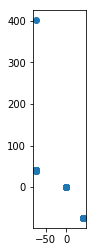

In [436]:
df.plot()

In [437]:
df = df[['pickup_longitude',
         'pickup_latitude',
         'dropoff_longitude','dropoff_latitude','fare_amount','geometry']]
df = df[df.pickup_latitude != 0].reset_index(drop=True)
df = df[(df.pickup_latitude < 90)&(df.pickup_latitude > -90)].reset_index(drop=True)
df = df[(df.dropoff_latitude < 90)&(df.dropoff_latitude > -90)].reset_index(drop=True)
df = gpd.GeoDataFrame(df)

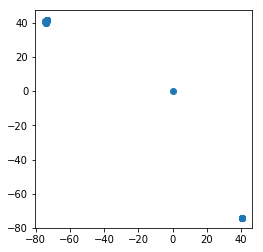

In [438]:
df.plot()

In [439]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
count,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000
mean,-73.885251,40.665178,-73.847567,40.649281,11.230443
std,3.153901,3.092117,3.551943,3.197891,9.513349
min,-74.438233,-74.006893,-74.429332,-73.994392,-2.900000
25%,-73.992244,40.736064,-73.991275,40.736624,6.000000
50%,-73.982085,40.753389,-73.980477,40.754462,8.500000
75%,-73.968223,40.768039,-73.965321,40.768558,12.500000
max,40.766125,41.366138,40.802437,41.366138,180.000000


In [486]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [493]:
routes = []
for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    try:
        routes.append(osmnx_route(row.pickup_longitude, row.pickup_latitude,
                       row.dropoff_longitude, row.dropoff_latitude))
    except nx.NetworkXNoPath:
        routes.append(None)
        
df['geometry'] = routes
df = gpd.GeoDataFrame(df, crs={'init': 'epsg:4326'})

df = df.dropna()
df = df.to_crs(epsg=32618)

df['route_len'] = df.geometry.length

In [494]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [495]:
X['gc_distance'] = [distance.great_circle((x1,y1),(x2,y2)).m for x1,y1,x2,y2 in zip(X.pickup_latitude,
                                                                           X.pickup_longitude,
                                                                          X.dropoff_latitude,
                                                                          X.pickup_longitude)]

In [506]:
cross_val_score(XGBRegressor().fit(X[['gc_distance']],y),
                X[['gc_distance']], y, cv=5, scoring='neg_mean_absolute_error')

array([-3.85088544, -3.56200398, -3.73687092, -3.87079806, -3.74152985])

In [507]:
np.mean(cross_val_score(XGBRegressor().fit(X[['gc_distance']],y),
                        X[['gc_distance']], y, cv=5, scoring='neg_mean_absolute_error'))

-3.7524176516876144

In [501]:
X['geo_distance'] = [distance.geodesic((x1,y1),(x2,y2)).m for x1,y1,x2,y2 in zip(X.pickup_latitude,
                                                                           X.pickup_longitude,
                                                                          X.dropoff_latitude,
                                                                          X.pickup_longitude)]

In [508]:
cross_val_score(XGBRegressor().fit(X[['geo_distance']],y),
                X[['geo_distance']], y, cv=5, scoring='neg_mean_absolute_error')

array([-3.85191305, -3.55427216, -3.72991741, -3.86878107, -3.74953439])

In [509]:
np.mean(cross_val_score(XGBRegressor().fit(X[['geo_distance']],y),
                        X[['geo_distance']], y, cv=5, scoring='neg_mean_absolute_error'))

-3.7508836164295536

In [510]:
cross_val_score(XGBRegressor().fit(X[['route_len']],y),
                        X[['route_len']], y, cv=5, scoring='neg_mean_absolute_error')

array([-2.76172694, -2.44171311, -2.5839316 , -2.59251232, -2.54465762])

In [511]:
np.mean(cross_val_score(XGBRegressor().fit(X[['route_len']],y),
                        X[['route_len']], y, cv=5, scoring='neg_mean_absolute_error'))

-2.584908315674425

In [514]:
np.mean(cross_val_score(XGBRegressor().fit(X[['pickup_longitude','route_len',
                          'pickup_latitude',
                           'dropoff_longitude','dropoff_latitude']],y),
                        X[['pickup_longitude','route_len',
                          'pickup_latitude',
                           'dropoff_longitude','dropoff_latitude']], y, cv=5, scoring='neg_mean_absolute_error'))


-2.3495157399237687

In [515]:
np.mean(cross_val_score(XGBRegressor().fit(X[['pickup_longitude',
                          'pickup_latitude',
                           'dropoff_longitude','dropoff_latitude']],y),
                        X[['pickup_longitude',
                          'pickup_latitude',
                           'dropoff_longitude','dropoff_latitude']], y, cv=5, scoring='neg_mean_absolute_error'))

-2.9968899302446657

In [517]:
cross_val_score(XGBRegressor().fit(X[['pickup_longitude',
                          'pickup_latitude',
                           'dropoff_longitude','dropoff_latitude', 'geo_distance']],y),
                        X[['pickup_longitude',
                          'pickup_latitude',
                           'dropoff_longitude','dropoff_latitude', 'geo_distance']], y, cv=5, scoring='neg_mean_absolute_error')

array([-2.63045658, -2.42483347, -2.57471545, -2.53678026, -2.42914935])

In [518]:
cross_val_score(XGBRegressor().fit(X[['pickup_longitude',
                          'pickup_latitude',
                           'dropoff_longitude','dropoff_latitude', 'route_len']],y),
                        X[['pickup_longitude',
                          'pickup_latitude',
                           'dropoff_longitude','dropoff_latitude', 'route_len']], y, cv=5, scoring='neg_mean_absolute_error')

array([-2.53406623, -2.23251619, -2.28541208, -2.32188428, -2.37084022])

In [520]:
amenity_osm[amenity_osm.amenity == 'airport']

,center,id,nodes,access,addr:block,addr:city,addr:country,addr:county,addr:district,addr:housename,...,water,waterway,website,website_archive,wheelchair,wheelchair:description,wifi,wiki,wikidata,wikipedia
